# análisis Exploratorio de Datos del Dataset de Candidatos

 ## Configuración del Entorno

In [2]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine, text
from dotenv import load_dotenv

In [3]:

load_dotenv()  

DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")

# 3. Crear engine de conexión a la base de datos
engine = create_engine(
    f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)


df = pd.read_sql("SELECT * FROM raw_candidates", con=engine)




### Preparación de los Datos

In [4]:
renamed_columns = {
    'ï»¿First Name': 'first_name',
    'Last Name': 'last_name',
    'Email': 'email',
    'Application Date': 'application_date',
    'Country': 'country',
    'YOE': 'yoe',
    'Seniority': 'seniority',
    'Technology': 'technology',
    'Code Challenge Score': 'code_challenge_score',
    'Technical Interview Score': 'technical_interview_score'
}

df = df.rename(columns=renamed_columns)


## Comprensión de datos

El informe anterior nos da múltiples conclusiones:

Los Datatypes de las distintas columnas son apropiados para realizar un análisis del dataset sin muchas complicaciones: no se requiere una transformación profunda en este aspecto.

Hay 50.000 entradas en el dataframe. Teniendo esto en cuenta al revisar el recuento de datos no nulos podemos concluir que no hay ningún dato nulo.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   first_name                 50000 non-null  object
 1   last_name                  50000 non-null  object
 2   email                      50000 non-null  object
 3   application_date           50000 non-null  object
 4   country                    50000 non-null  object
 5   yoe                        50000 non-null  int64 
 6   seniority                  50000 non-null  object
 7   technology                 50000 non-null  object
 8   code_challenge_score       50000 non-null  int64 
 9   technical_interview_score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


### Revisar si hay valores nulos

Con esta sección confirmamos que no hay datos nulos en el conjunto de datos que tenemos.

In [25]:
df.isnull().sum()

first_name                   0
last_name                    0
email                        0
application_date             0
country                      0
yoe                          0
seniority                    0
technology                   0
code_challenge_score         0
technical_interview_score    0
dtype: int64

### Contando los valores únicos en cada columna

In [12]:
df.nunique()

first_name                    3007
last_name                      474
email                        49833
application_date              1646
country                        244
yoe                             31
seniority                        7
technology                      24
code_challenge_score            11
technical_interview_score       11
dtype: int64

### Analicemos esos registros

In [13]:
duplicated_emails = df.loc[df.duplicated(subset=['email'], keep=False)]
duplicated_emails["email"].value_counts()

email
marianne31@yahoo.com        3
fern70@gmail.com            3
sandra83@gmail.com          2
dewayne50@gmail.com         2
matilda17@gmail.com         2
                           ..
marjolaine91@hotmail.com    2
jazmin54@gmail.com          2
reyna2@hotmail.com          2
kasandra68@hotmail.com      2
easter75@gmail.com          2
Name: count, Length: 165, dtype: int64

### Analisis numerico de los datos

In [14]:
df.describe()

,yoe,code_challenge_score,technical_interview_score
count,50000.000000,50000.000000,50000.000000
mean,15.286980,4.996400,5.003880
std,8.830652,3.166896,3.165082
min,0.000000,0.000000,0.000000
25%,8.000000,2.000000,2.000000
50%,15.000000,5.000000,5.000000
75%,23.000000,8.000000,8.000000
max,30.000000,10.000000,10.000000


### Análisis de los resultados de las entrevistas técnicas y de los desafíos de código

In [15]:
score_counts = (df[['code_challenge_score', 'technical_interview_score']].agg(pd.Series.value_counts)
                .sort_index()
                .rename_axis('score'))
score_counts

,code_challenge_score,technical_interview_score
score,,
0,4502,4539
1,4590,4588
2,4579,4500
3,4678,4528
4,4521,4578
5,4479,4527
6,4419,4471
7,4506,4578
8,4619,4555


### code_challenge_score

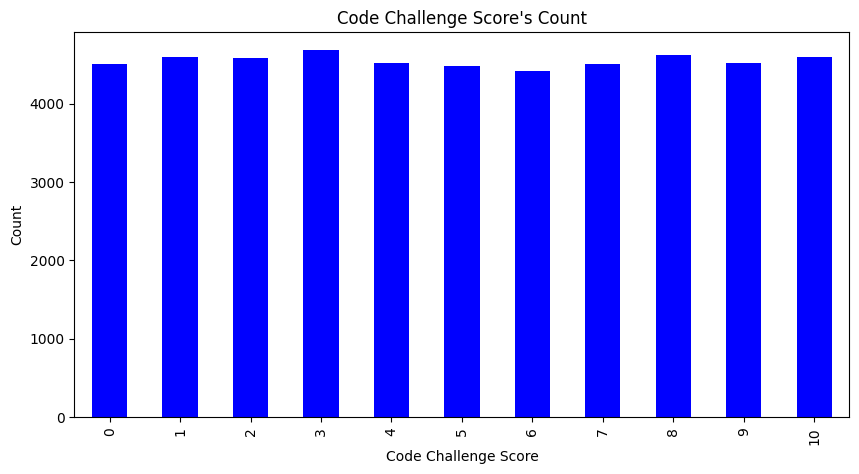

In [18]:
code_score = (df['code_challenge_score']
                       .value_counts()
                       .sort_index())

code_score.plot(kind='bar', figsize=(10, 5), title="Code Challenge Score's Count", color='blue')
plt.xlabel('Code Challenge Score')
plt.ylabel('Count')
plt.show()

### technical_interview_score

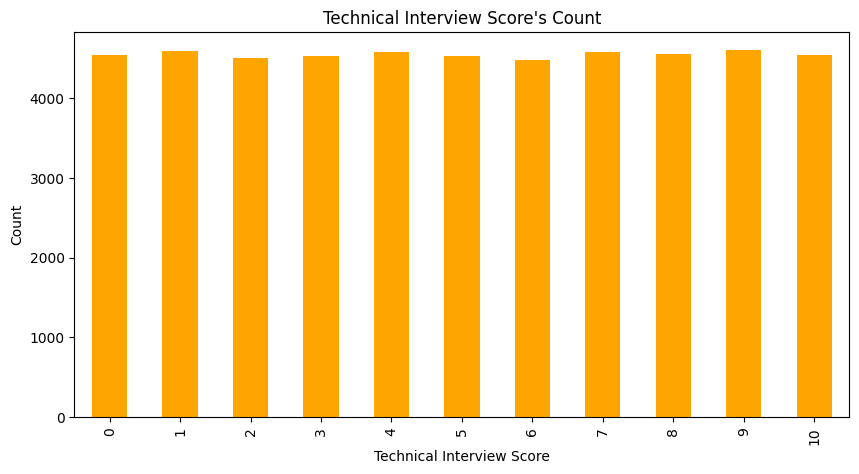

In [19]:
technical_interview_score = (df['technical_interview_score']
                            .value_counts()
                            .sort_index())

technical_interview_score.plot(kind='bar', figsize=(10, 5), title="Technical Interview Score's Count", color="orange")
plt.xlabel('Technical Interview Score')
plt.ylabel('Count')
plt.show()

### Transformacion

In [6]:

df['hired'] = ((df['code_challenge_score'] >= 7) & (df['technical_interview_score'] >= 7)).astype(bool)

# Limpiar duplicados por email, manteniendo el registro más reciente (basado en application_date)
df = df.sort_values('application_date', ascending=False).drop_duplicates(subset='email', keep='first')

print("Número de candidatos tras eliminar duplicados por email:", len(df))
df.head()

Número de candidatos tras eliminar duplicados por email: 49833


,first_name,last_name,email,application_date,country,yoe,seniority,technology,code_challenge_score,technical_interview_score,hired
23098,Philip,Hessel,kallie.hilpert48@gmail.com,2022-07-04,Uzbekistan,28,Intern,Client Success,4,5,False
13850,Trystan,Crona,aditya.walsh@gmail.com,2022-07-04,Zambia,23,Intern,Adobe Experience Manager,2,4,False
13653,Clarissa,Rogahn,winston14@hotmail.com,2022-07-04,Brunei Darussalam,25,Architect,QA Manual,7,0,False
45936,Maritza,Beer,theodora_grimes28@gmail.com,2022-07-04,Algeria,10,Architect,Data Engineer,6,8,False
38122,Eulalia,Schaden,chadd_wunsch@gmail.com,2022-07-04,Niger,0,Lead,QA Manual,8,9,True


### categorizacion para technology

In [66]:
df.technology.unique()

array(['Data / Engineering', 'Sales / Client', 'QA', 'Marketing', 'Adobe',
       'Mulesoft', 'Development', 'Salesforce', 'Admin / SysOps',
       'Security', 'Others', 'Design', 'Analytics / PM',
       'Technical Writing'], dtype=object)

In [57]:
# Diccionario de mapeo: cada clave es el valor exacto que aparece en df['technology']
tech_mapping = {
    'Data Engineer': 'Data / Engineering',
    'Client Success': 'Sales / Client',
    'QA Manual': 'QA',
    'Social Media Community Management': 'Marketing',
    'Adobe Experience Manager': 'Adobe',
    'Sales': 'Sales / Client',
    'Mulesoft': 'Mulesoft',
    'DevOps': 'Development',
    'Development - CMS Backend': 'Development',
    'Salesforce': 'Salesforce',
    'System Administration': 'Admin / SysOps',
    'Security': 'Security',
    'Game Development': 'Development',
    'QA CMS Frontend': 'QA',
    'Security Compliance': 'Security',
    'Development - Backend': 'Development',
    'Design': 'Design',
    'Business Analytics / Project Management': 'Analytics / PM',
    'Development - Frontend': 'Development',
    'Development - FullStack': 'Development',
    'Business Intelligence': 'Data / Engineering',
    'Database Administration': 'Admin / SysOps',
    'QA Automation': 'QA',
    'Technical Writing': 'Technical Writing'
}

# Reemplazar los valores de la columna "technology" por las categorías definidas
# Si aparece algún valor que no está en el diccionario, lo convertimos en "Others"
df['technology'] = df['technology'].map(tech_mapping).fillna('Others')

# Verificamos los primeros resultados para confirmar el reemplazo
df[['technology']].head(10)


,technology
0,Data / Engineering
1,Data / Engineering
2,Sales / Client
3,QA
4,Marketing
5,Adobe
6,Sales / Client
7,Mulesoft
8,Marketing
9,Development


## Visualizaciones 

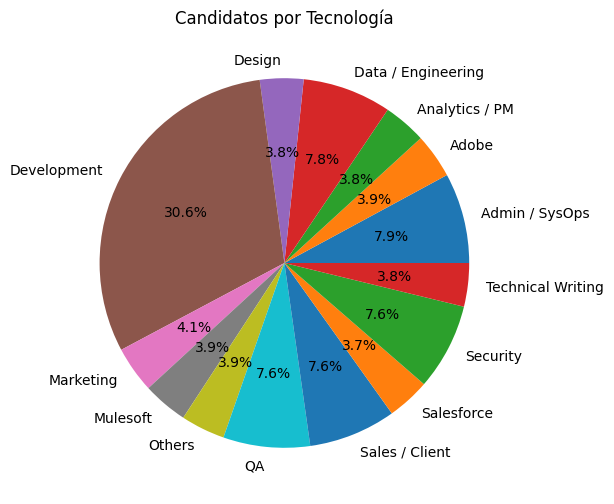

In [58]:
# 1. Distribución por Tecnología (Gráfico de pastel)
tech_counts = df.groupby('technology').size()
plt.figure(figsize=(6, 6))
tech_counts.plot(kind='pie', autopct='%1.1f%%', title='Candidatos por Tecnología')
plt.ylabel('')  # Ocultar etiqueta del eje y
plt.show()

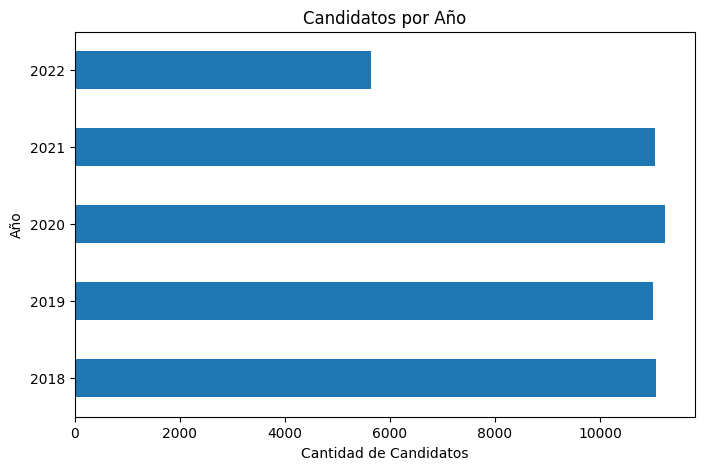

In [59]:

df['year'] = df['application_date'].dt.year  # Extraer el año si no está extraído
year_counts = df.groupby('year').size()
plt.figure(figsize=(8, 5))
year_counts.plot(kind='barh', title='Candidatos por Año')
plt.xlabel('Cantidad de Candidatos')
plt.ylabel('Año')
plt.show()



Text(0, 0.5, 'Cantidad')

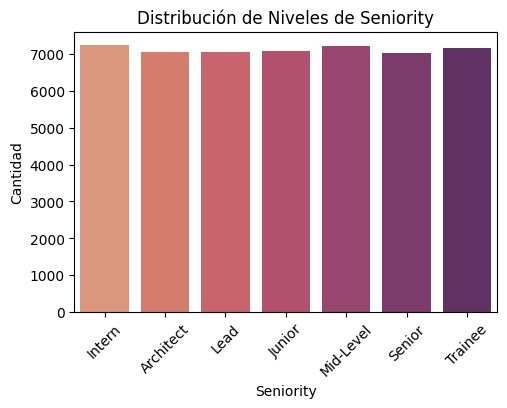

In [12]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='seniority', hue='seniority', palette='flare', legend=False)
plt.title('Distribución de Niveles de Seniority')
plt.xticks(rotation=45)
plt.xlabel('Seniority')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

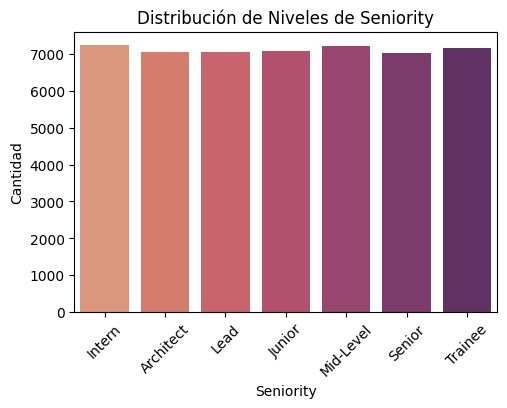

In [13]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='seniority', hue='seniority', palette='flare', legend=False)
plt.title('Distribución de Niveles de Seniority')
plt.xticks(rotation=45)
plt.xlabel('Seniority')
plt.ylabel('Cantidad')


## Conclusiones

-una cantidad importante de candidatos aplica más de una vez. Este hallazgo me indica que muchos están realmente interesados en la oportunidad, lo que podría motivarme a revisar el proceso de selección para identificar posibles áreas de mejora.

-No encontré una correlación clara entre los años de experiencia y el nivel de seniority asignado. Esto me hace pensar que, más allá de la experiencia, otros factores como habilidades técnicas o aptitudes específicas pueden estar influyendo en la definición del rol.

-Considero que las diversas especializaciones tecnológicas podrían agruparse en categorías más amplias. Esto facilitaría futuros análisis y la elaboración de dashboards que muestren de forma más comprensible la distribución de conocimientos en el mercado.